In [1]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Reading the dataset
India = pd.read_csv('Data/India_Covid.csv')
USA = pd.read_csv('Data/USA_Covid.csv')
UK = pd.read_csv('Data/UK_Covid.csv')
Italy = pd.read_csv('Data/Italy_Covid.csv')
Belgium = pd.read_csv('Data/Belgium_Covid.csv')
France = pd.read_csv('Data/France_Covid.csv')
S_korea = pd.read_csv('Data/South_Korea_Covid.csv')

frames = [India, USA, UK, Italy, Belgium, France, S_korea]
data = pd.concat(frames)

#Converting the datatype of dates to datetime
dates = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

# Adding dates to the dataframe
data['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 100
Data columns (total 16 columns):
Date                            707 non-null datetime64[ns]
day                             707 non-null int64
month                           707 non-null int64
year                            707 non-null int64
popData2018                     707 non-null int64
Daily_total_tests               707 non-null float64
Daily_tests_per_thousand        707 non-null float64
tests_per_thousand              707 non-null float64
cases                           707 non-null int64
deaths                          707 non-null int64
Lockdown                        707 non-null int64
Public_Health                   707 non-null int64
Governance_and_socioeconomic    707 non-null int64
Humanitarian_exemption          707 non-null int64
Social_distancing               707 non-null int64
Movement_restrictions           707 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 9

In [4]:
# Dataset Preprocessing before running the model
def dataset_preprocess(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    # Creating different columns with regressor variables
#    ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
 #   df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    df = df.drop(['year', 'Humanitarian_exemption', 'popData2018'], axis = 1)
    #df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

def create_cumm(df):
    y = np.zeros(len(df))
    x = np.array(df.cases)
    y[0]=x[0]
    for i in range(1,len(df)):
        y[i] = y[i-1]+x[i]
    df['cumm_cases'] = y
    return(df)

In [5]:
# Preprocessing Datasets
UK_updated = dataset_preprocess(UK)
Belgium_updated  = dataset_preprocess(Belgium)
USA_updated = dataset_preprocess(USA)
Italy_updated = dataset_preprocess(Italy)
# Spain_updated = dataset_preprocess(Spain)
# Germany_updated = dataset_preprocess(Germany)
France_updated = dataset_preprocess(France)
# China_updated = dataset_preprocess(China)
S_korea_updated = create_cumm(dataset_preprocess(S_korea))
India_updated = dataset_preprocess(India)

In [6]:
#df_filtered = USA_updated[USA_updated['cases'] > 0] 

In [7]:
S_korea_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2019-12-31 to 2020-04-09
Data columns (total 13 columns):
day                             101 non-null int64
month                           101 non-null int64
Daily_total_tests               101 non-null int64
Daily_tests_per_thousand        101 non-null float64
tests_per_thousand              101 non-null float64
cases                           101 non-null int64
deaths                          101 non-null int64
Lockdown                        101 non-null int64
Public_Health                   101 non-null int64
Governance_and_socioeconomic    101 non-null int64
Social_distancing               101 non-null int64
Movement_restrictions           101 non-null int64
cumm_cases                      101 non-null float64
dtypes: float64(3), int64(10)
memory usage: 11.0+ KB


In [8]:
# Plotting the Confirmed Cases with Date
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df, label):
    sns.set(rc = {'figure.figsize':(11,4)})
    df[label].plot(linewidth = 3, color = 'purple')

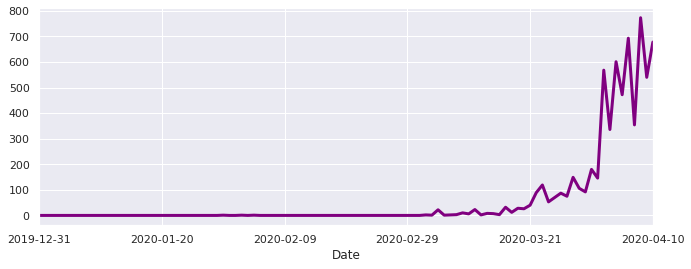

In [9]:
plot_data(India_updated, 'cases')

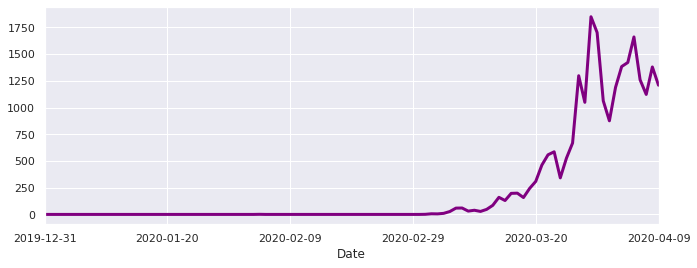

In [10]:
plot_data(Belgium_updated, 'cases')

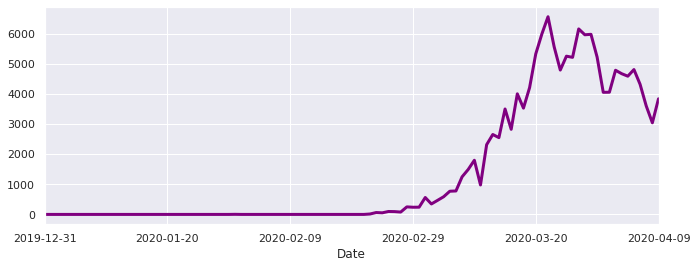

In [11]:
plot_data(Italy_updated, 'cases')

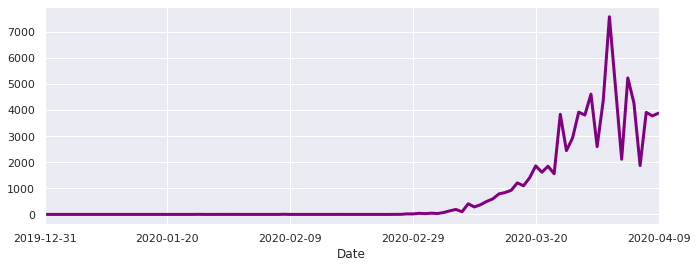

In [12]:
plot_data(France_updated, 'cases')

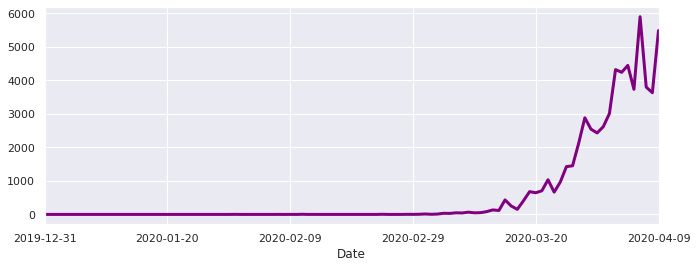

In [13]:
# plot_data(Germany_updated, 'cases')
plot_data(UK_updated, 'cases')

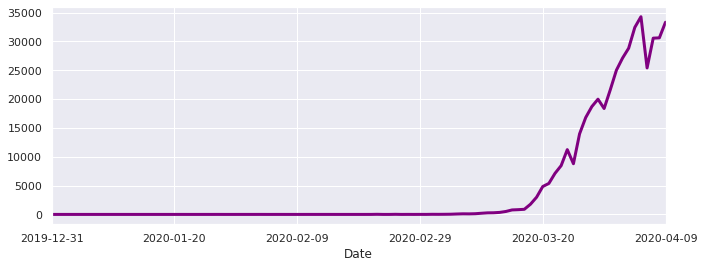

In [14]:
plot_data(USA_updated, 'cases')

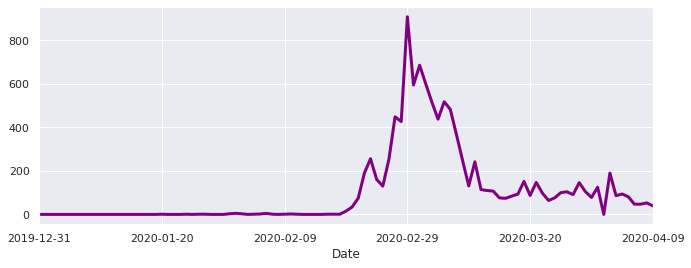

In [15]:
plot_data(S_korea_updated, 'cases')

In [16]:
USA_updated.head()

,day,month,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand,cases,deaths,Lockdown,Public_Health,Governance_and_socioeconomic,Social_distancing,Movement_restrictions
Date,,,,,,,,,,,,
2019-12-31,31,12,0,0.0,0.0,0,0,0,0,0,0,0
2020-01-01,1,1,0,0.0,0.0,0,0,0,0,0,0,0
2020-01-02,2,1,0,0.0,0.0,0,0,0,0,0,0,0
2020-01-03,3,1,0,0.0,0.0,0,0,0,0,0,0,0
2020-01-04,4,1,0,0.0,0.0,0,0,0,0,0,0,0


In [17]:
USA_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2019-12-31 to 2020-04-09
Data columns (total 12 columns):
day                             101 non-null int64
month                           101 non-null int64
Daily_total_tests               101 non-null int64
Daily_tests_per_thousand        101 non-null float64
tests_per_thousand              101 non-null float64
cases                           101 non-null int64
deaths                          101 non-null int64
Lockdown                        101 non-null int64
Public_Health                   101 non-null int64
Governance_and_socioeconomic    101 non-null int64
Social_distancing               101 non-null int64
Movement_restrictions           101 non-null int64
dtypes: float64(2), int64(10)
memory usage: 10.3+ KB


In [18]:
# Train test split
expr1 = """ cases ~ day + month """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
expr2 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests"""
expr3 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests + Lockdown + Public_Health + Movement_restrictions"""
expr4 = """cases ~ day + month + Daily_tests_per_thousand  + tests_per_thousand + Daily_total_tests + Lockdown + Public_Health + Movement_restrictions + Governance_and_socioeconomic + Social_distancing"""
expr5 = """cases ~day + month + Lockdown + Public_Health + Movement_restrictions + Governance_and_socioeconomic + Social_distancing"""

def train_test_split(df,ratio, expr):
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
    print('Training data set length='+str(len(df_train)))
    print('Testing data set length='+str(len(df_test)))
    
#     # Expression for the Model 
#     expr1 = """ cases cases ~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""~ day + month + year   """#Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr2 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests"""
#     expr3 = """cases ~ day + month + year + Daily_tests_per_thousand  + Cum_tests_per_thousand + Daily_tests + popData2018"""

    ## Matrix Formation
    y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
    return X_train, y_train, X_test, y_test

def train_model(y_train, X_train):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    print(model.summary())
    return(model)

def predict(model, X_test):
    poisson_predictions = model.get_prediction(X_test)
    #.summary_frame() returns a pandas DataFrame
    predictions_summary_frame = poisson_predictions.summary_frame()
    print(predictions_summary_frame)
    return(predictions_summary_frame)
    
    
def plot_results(predictions_summary_frame,X_test, y_test, country, label):
    predicted_counts=predictions_summary_frame['mean']
    actual_counts = y_test[label]
    fig = plt.figure()
    fig.suptitle(str('Predicted Mean of Covid 19 Cofirmed Cases Count'))
    predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
    actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
    plt.legend(handles=[predicted, actual])
    plt.show()
    return(predicted_counts, actual_counts)
    
def plot_actual_vs_output(predicted_counts, actual_counts):
    plt.clf()
    fig = plt.figure()
    fig.suptitle('Scatter plot of Actual versus Predicted counts')
    plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
    plt.xlabel('Predicted counts')
    plt.ylabel('Actual counts')
    plt.show()

## INDIA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

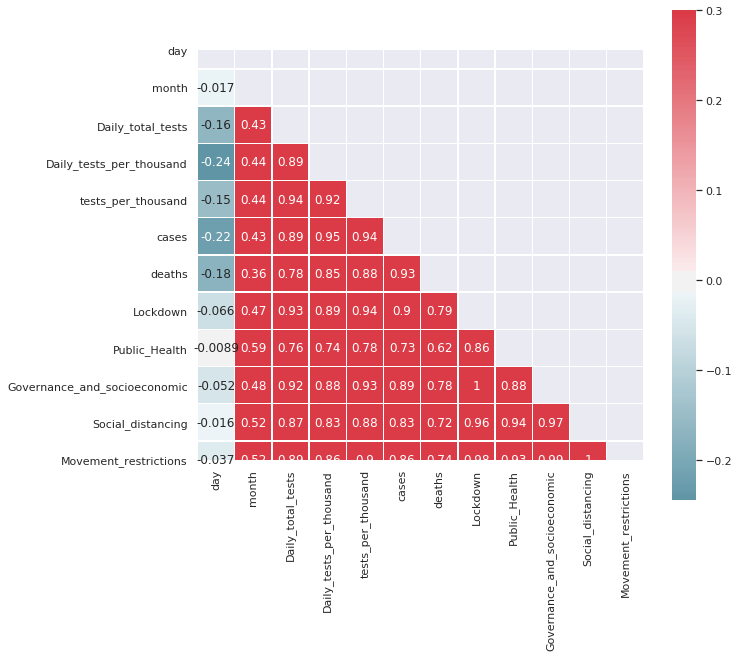

In [19]:
# Compute the correlation matrix
corr = India_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [20]:
df_filtered = India_updated#[India_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr4) 

Training data set length=82
Testing data set length=19


### STEP 2: MODEL TRAINING AND SUMMARY

In [21]:
model_India = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   82
Model:                            GLM   Df Residuals:                       71
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -343.71
Date:                Tue, 21 Apr 2020   Deviance:                       501.70
Time:                        04:55:18   Pearson chi2:                     652.
No. Iterations:                    12   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -23.0151      8.261     -2.786      0.005     -39.207      -6.82

### STEP 3: PREDICTIONS

In [22]:
predictions_frame = predict(model_India, X_train)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-01-01    0.000004   0.000014   2.328097e-09       0.005628
2020-01-02    0.000005   0.000018   4.171364e-09       0.005929
2020-01-03    0.000007   0.000024   7.463649e-09       0.006254
2020-01-04    0.000009   0.000031   1.333360e-08       0.006608
2020-01-05    0.000013   0.000041   2.377837e-08       0.006993
2020-01-07    0.000024   0.000072   7.515450e-08       0.007882
2020-01-08    0.000033   0.000094   1.331195e-07       0.008399
2020-01-10    0.000063   0.000162   4.138150e-07       0.009625
2020-01-12    0.000119   0.000276   1.266377e-06       0.011205
2020-01-13    0.000164   0.000360   2.198720e-06       0.012180
2020-01-15    0.000309   0.000609   6.499134e-06       0.014680
2020-01-17    0.000583   0.001025   1.855640e-05       0.018316
2020-01-18    0.000801   0.001331   3.082179e-05       0.020813
2020-01-19    0.001100   0.001730   5.04

### STEP 4: PLOTTING THE RESULTS

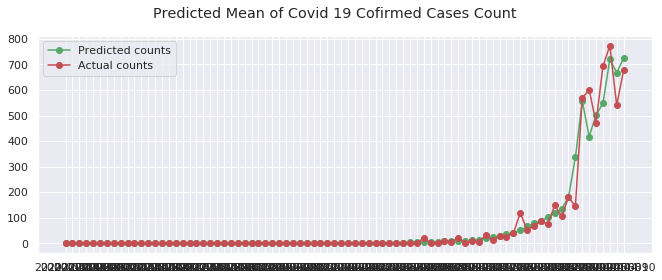

3.6198529370855687e-06 0.0
4.973090551106677e-06 0.0
6.83221944630118e-06 0.0
9.386360872119737e-06 0.0
1.2895336737077132e-05 0.0
2.4339046904097402e-05 0.0
3.3437901010188956e-05 0.0
6.311170135802312e-05 0.0
0.00011911892576901263 0.0
0.0001636500748775726 0.0
0.00030887807968999967 0.0
0.0005829857895534445 0.0
0.000800927875205877 0.0
0.0011003449359771975 0.0
0.0015116953918221923 0.0
0.0020768241693473913 0.0
0.0028532194076389705 0.0
0.003919860481345329 0.0
0.005385252235448514 0.0
0.006198558907429327 0.0
0.00821221099613119 0.0
0.00945245856539133 0.0
0.010880014282698343 0.0
0.012522809849768538 1.0
0.014414475084418383 0.0
0.022907920492557344 0.0
0.02636683417209308 1.0
0.030349744090033635 0.0
0.03493231390633508 1.0
0.04020910438508786 0.0
0.0462816765583096 0.0
0.05327135776350132 0.0
0.07057698999680796 0.0
0.08123586619110867 0.0
0.0935044970905983 0.0
0.10762599558669622 0.0
0.12388019064798797 0.0
0.14258917235864166 0.0
0.18891042041552697 0.0
0.2174405799351307 0

In [23]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, India, 'cases')
for i in range(len(predicted_counts.index)): 
    print(predicted_counts[i], actual_counts[i])

## USA MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

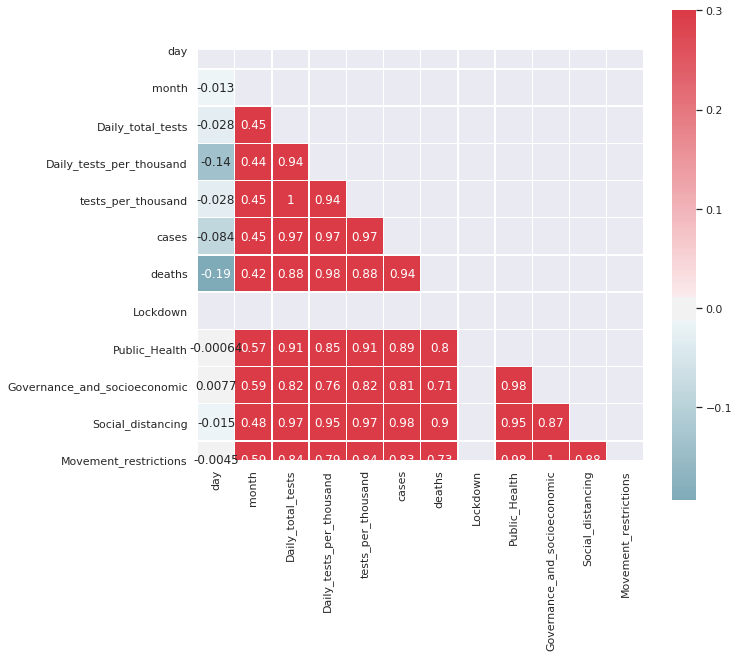

In [24]:
# Compute the correlation matrix
corr = USA_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [25]:
#df_filtered = USA_updated[USA_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(USA_updated,1, expr5) 

Training data set length=101
Testing data set length=0


### STEP 2: MODEL TRAINING AND SUMMARY

In [26]:
model_USA = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                  101
Model:                            GLM   Df Residuals:                       94
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8668.5
Date:                Tue, 21 Apr 2020   Deviance:                       16918.
Time:                        04:55:25   Pearson chi2:                 1.82e+04
No. Iterations:                    12   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.9201      0.130    -14.821      0.000      -2.174      -1.66

### STEP 3: PREDICTIONS

In [27]:
predictions_frame = predict(model_USA, X_train)

                    mean     mean_se  mean_ci_lower  mean_ci_upper
Date                                                              
2019-12-31     12.007680    3.457352       6.829266      21.112719
2020-01-01      0.208422    0.023655       0.166854       0.260347
2020-01-02      0.210437    0.023794       0.168608       0.262644
2020-01-03      0.212471    0.023935       0.170378       0.264965
2020-01-04      0.214525    0.024077       0.172165       0.267308
2020-01-05      0.216599    0.024221       0.173969       0.269676
2020-01-06      0.218693    0.024367       0.175790       0.272067
2020-01-07      0.220807    0.024515       0.177628       0.274483
2020-01-08      0.222942    0.024664       0.179483       0.276924
2020-01-09      0.225097    0.024816       0.181355       0.279389
2020-01-10      0.227273    0.024969       0.183245       0.281880
2020-01-11      0.229470    0.025125       0.185152       0.284396
2020-01-12      0.231688    0.025282       0.187077       0.28

### STEP 4: PLOTTING THE RESULTS

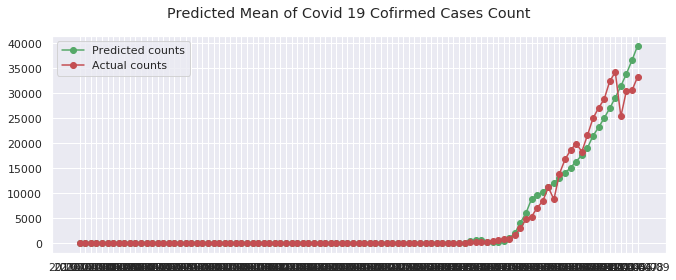

In [28]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, USA, 'cases')

## UK MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

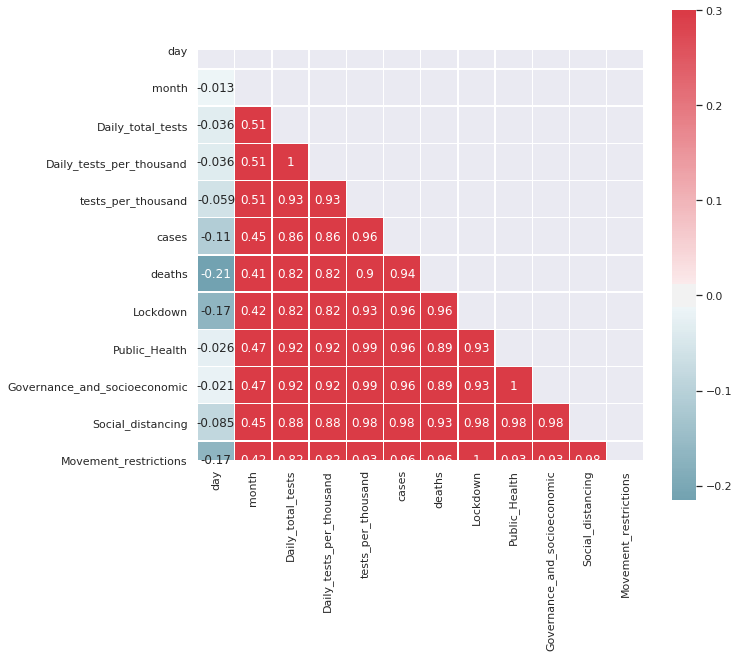

In [29]:
# Compute the correlation matrix
corr = UK_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [30]:
df_filtered = UK_updated[UK_updated['cases'] > 0] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,1, expr4) 

Training data set length=48
Testing data set length=0


### STEP 2: MODEL TRAINING AND SUMMARY

In [31]:
model_UK = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   48
Model:                            GLM   Df Residuals:                       38
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1492.4
Date:                Tue, 21 Apr 2020   Deviance:                       2650.5
Time:                        04:55:32   Pearson chi2:                 2.94e+03
No. Iterations:                    10   Covariance Type:             nonrobust
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -17.2750      1.106    -15.625      0.000     -19.442     -15.10

### STEP 3: PREDICTIONS

In [32]:
predictions_frame = predict(model_UK, X_train)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-31     0.016399   0.007113       0.007008       0.038373
2020-02-07     0.080294   0.028702       0.039848       0.161792
2020-02-09     0.124940   0.041985       0.064664       0.241403
2020-02-11     0.188706   0.059357       0.101869       0.349568
2020-02-13     0.259106   0.075874       0.145956       0.459976
2020-02-24     2.467314   0.433655       1.748306       3.482022
2020-02-28     5.449487   0.731530       4.188820       7.089564
2020-02-29     6.526898   0.809335       5.118679       8.322537
2020-03-01    13.344950   1.242396      11.119142      16.016316
2020-03-02    14.912098   1.244236      12.662405      17.561487
2020-03-03    19.399175   1.443028      16.767401      22.444026
2020-03-04    22.947345   1.507483      20.175038      26.100603
2020-03-05    25.901472   1.490699      23.138516      28.994350
2020-03-06    29.461203  

### STEP 4: PLOTTING THE RESULTS

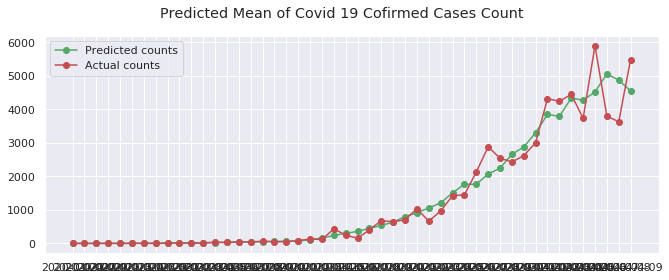

In [33]:
predicted_counts, actual_counts = plot_results(predictions_frame,X_train, y_train, UK, 'cases')

## South Korea MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

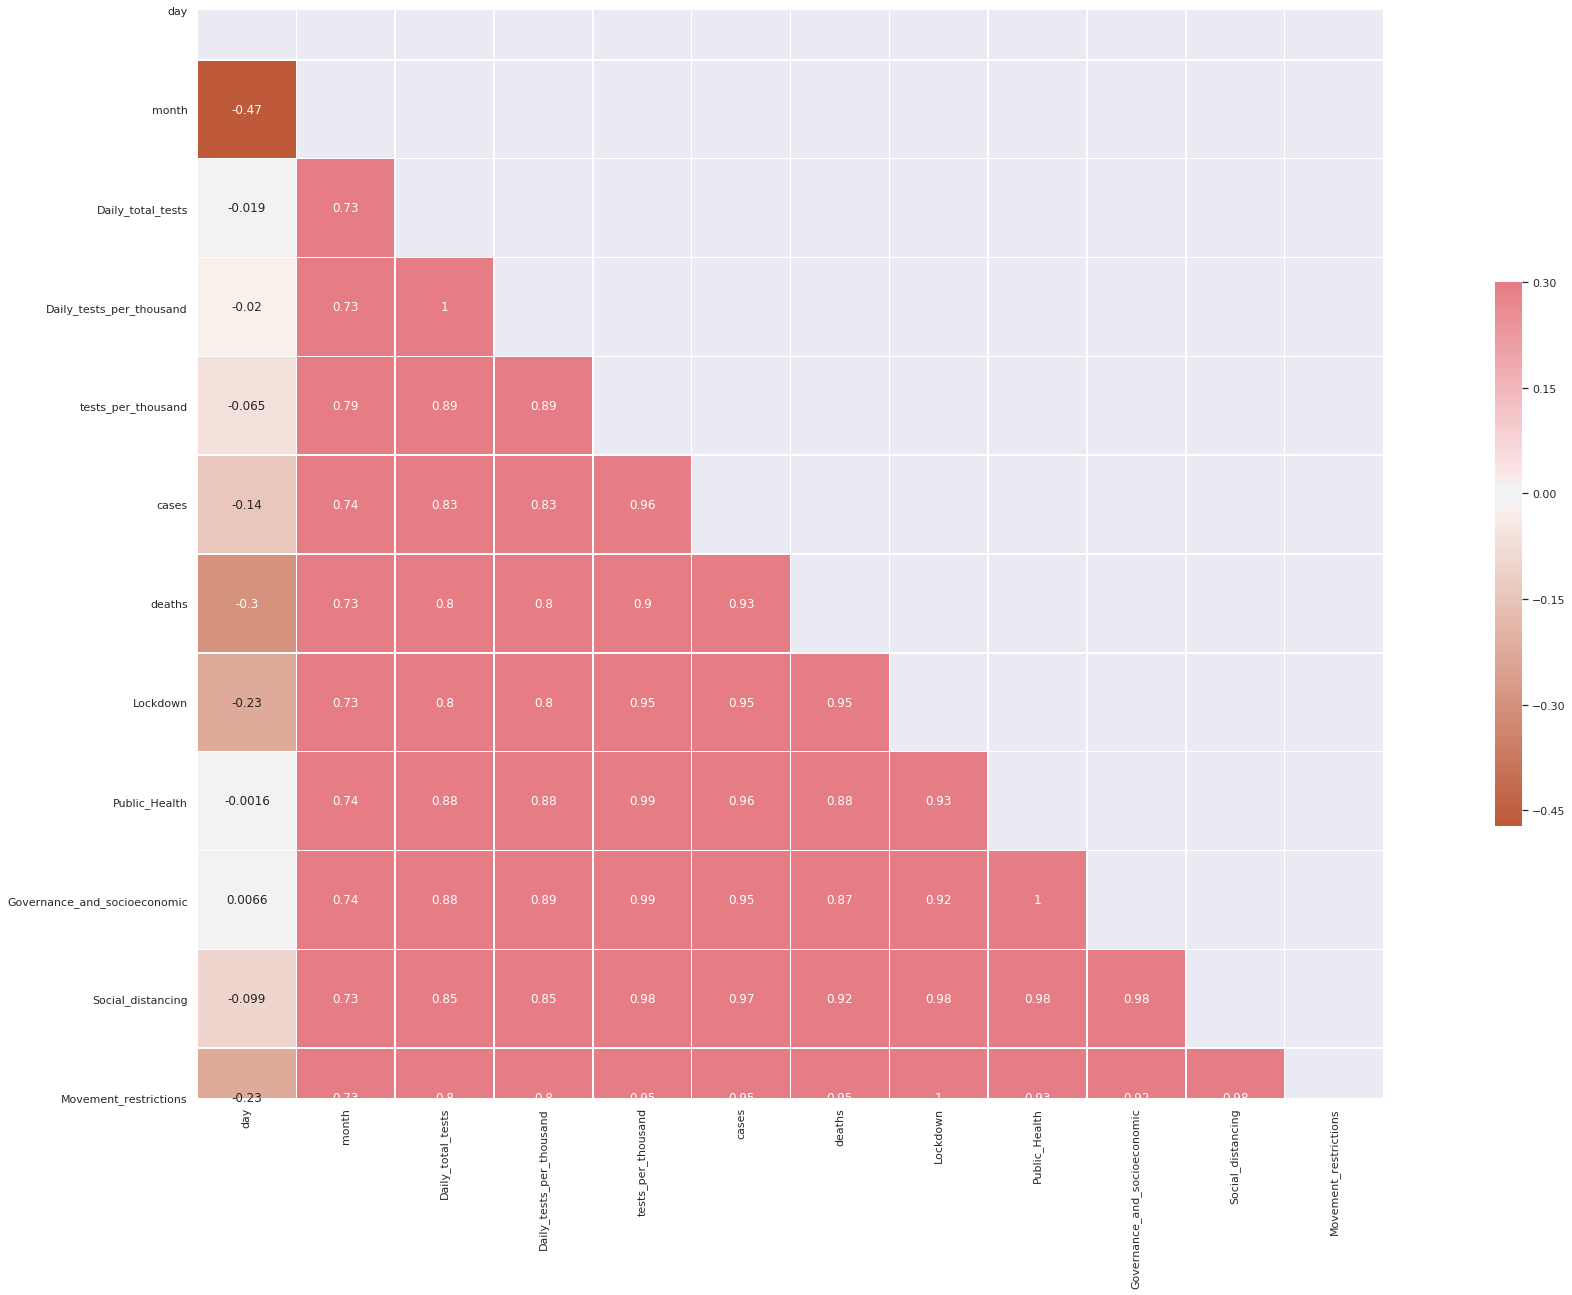

In [34]:
# Compute the correlation matrix
corr = df_filtered.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
df_filtered = S_korea_updated[S_korea_updated['cumm_cases'] > 0]
df_filtered = df_filtered[df_filtered['cumm_cases'] >  6000 ]
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.7, expr3) 

Training data set length=19
Testing data set length=16


#### STEP 2: MODEL TRAINING AND SUMMARY

In [36]:
model_S_Korea = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   19
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.818
Date:                Tue, 21 Apr 2020   Deviance:                       63.986
Time:                        04:55:38   Pearson chi2:                     63.6
No. Iterations:                     4   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   58.8730      7.017      8.390      0.000      45.119      72.627
day       

### STEP 3: PREDICTIONS

In [37]:
predictions_frame = predict(model_S_Korea, X_train)

                  mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                           
2020-03-09  249.864165  15.701132     220.910116     282.613138
2020-03-12  114.038829   6.873590     101.332166     128.338858
2020-03-13  107.658390   5.942060      96.619982     119.957887
2020-03-14   96.653413   5.430136      86.575577     107.904360
2020-03-17  105.323103   5.574314      94.945217     116.835334
2020-03-18  100.951266   5.530918      90.672614     112.395106
2020-03-19  125.061100   8.057694     110.224790     141.894384
2020-03-20  100.171138   8.504268      84.816007     118.306169
2020-03-21  110.961044   7.161238      97.776712     125.923168
2020-03-22   87.105132   5.274685      77.356872      98.081836
2020-03-23   92.119505   4.233710      84.184340     100.802633
2020-03-24  106.906490   5.117731      97.332106     117.422689
2020-03-26   93.961430   4.985893      84.680254     104.259848
2020-03-27  109.946254   5.751179      9

### STEP 4: PLOTTING THE RESULTS

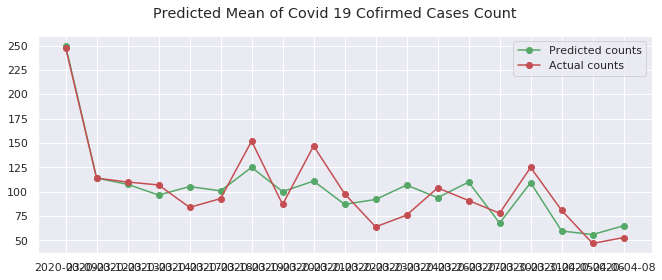

In [38]:
predicted_counts, actual_counts = plot_results(predictions_frame, X_train, y_train, S_korea, 'cases')

## ITALY MODEL: Poisson Regression for confirmed Cases Count

## Plotting the Correlation Graph

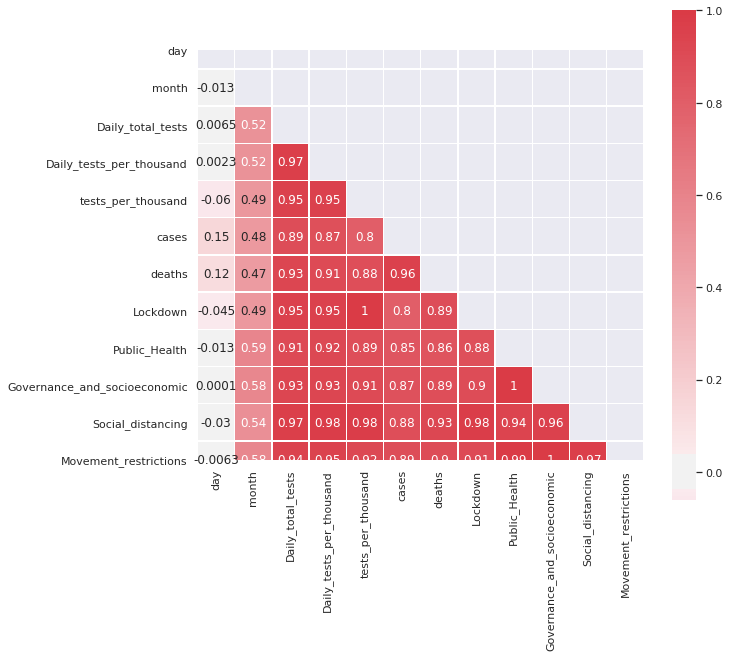

In [39]:
# Compute the correlation matrix
corr = Italy_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(2, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [40]:
df_filtered = Italy_updated[Italy_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr3) 

Training data set length=42
Testing data set length=7


### STEP 2: MODEL TRAINING AND SUMMARY

In [41]:
model_Italy = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   42
Model:                            GLM   Df Residuals:                       33
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -905.14
Date:                Tue, 21 Apr 2020   Deviance:                       1434.7
Time:                        04:55:43   Pearson chi2:                 1.43e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.0768      0.548    -14.728      0.000      -9.152      -7.002
day       

### STEP 3: PREDICTIONS

In [42]:
predictions_frame = predict(model_Italy, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-02-23    67.339202   3.017325      61.677598      73.520505
2020-03-11  1884.806504  11.290763    1862.806419    1907.066415
2020-03-16  3447.233601  28.933305    3390.989253    3504.410840
2020-03-26  5484.055461  54.445503    5378.375753    5591.811670
2020-03-27  4978.732818  53.296447    4875.361909    5084.295471
2020-04-05  4568.456085  41.564083    4487.714009    4650.650856
2020-04-07  3304.936780  41.575046    3224.447525    3387.435222


### STEP 4: PLOTTING THE RESULTS

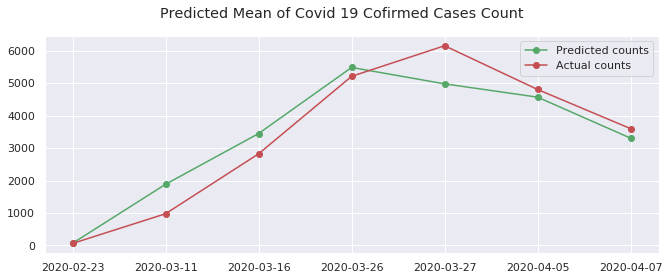

(Date
 2020-02-23      67.339202
 2020-03-11    1884.806504
 2020-03-16    3447.233601
 2020-03-26    5484.055461
 2020-03-27    4978.732818
 2020-04-05    4568.456085
 2020-04-07    3304.936780
 Name: mean, dtype: float64, Date
 2020-02-23      62.0
 2020-03-11     977.0
 2020-03-16    2823.0
 2020-03-26    5210.0
 2020-03-27    6153.0
 2020-04-05    4805.0
 2020-04-07    3599.0
 Name: cases, dtype: float64)

In [43]:
plot_results(predictions_frame,X_test, y_test, Italy, 'cases')

## FRANCE MODEL: Poisson Regression for confirmed Cases Count

## Correlation Plot

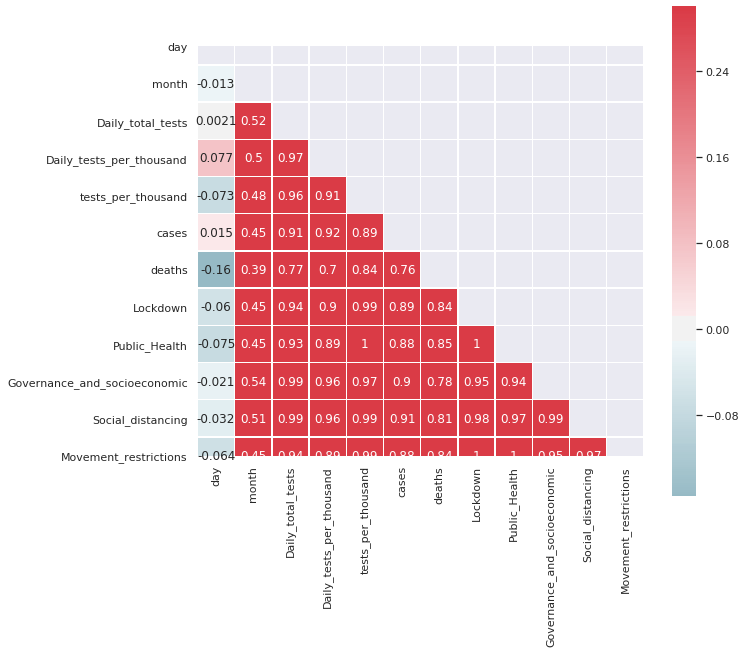

In [44]:
# Compute the correlation matrix
corr = France_updated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### STEP 1: TEST TRAIN SPLIT

In [45]:
df_filtered = France_updated[France_updated['cases'] > 0 ] 
X_train, y_train, X_test, y_test = train_test_split(df_filtered,0.8, expr2) 

Training data set length=39
Testing data set length=11


### STEP 2: MODEL TRAINING AND SUMMARY

In [46]:
model_France = train_model(y_train, X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  cases   No. Observations:                   39
Model:                            GLM   Df Residuals:                       33
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2712.8
Date:                Tue, 21 Apr 2020   Deviance:                       5122.9
Time:                        04:55:45   Pearson chi2:                 7.63e+03
No. Iterations:                    10   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -18.7604      1.013    -18.518      0.000     -20.746     -16.775
day       

### STEP 3: PREDICTIONS

In [47]:
predictions_frame = predict(model_France, X_test)

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2020-01-30     0.011343   0.004246       0.005447       0.023622
2020-02-08     0.138602   0.038708       0.080178       0.239599
2020-02-26     8.261019   0.828799       6.786339      10.056148
2020-03-04    95.194808   3.055054      89.391442     101.374934
2020-03-05   120.193394   3.247912     113.993242     126.730776
2020-03-11   420.717615   7.925729     405.466757     436.542105
2020-03-14   616.436057   9.317321     598.442288     634.970856
2020-03-29  3375.197781  27.764904    3321.215912    3430.057053
2020-03-30  3290.745221  30.622606    3231.270044    3351.315107
2020-04-06  4465.755819  27.847840    4411.507245    4520.671490
2020-04-08  4365.938008  35.948231    4296.046242    4436.966833


### STEP 4: PLOTTING THE RESULTS

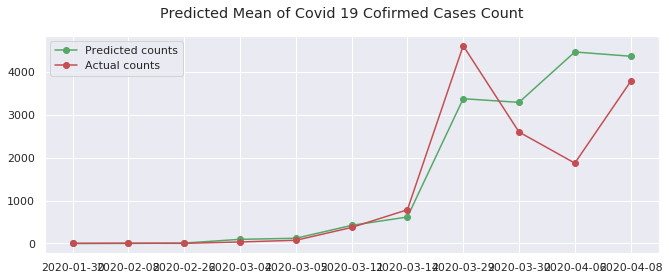

(Date
 2020-01-30       0.011343
 2020-02-08       0.138602
 2020-02-26       8.261019
 2020-03-04      95.194808
 2020-03-05     120.193394
 2020-03-11     420.717615
 2020-03-14     616.436057
 2020-03-29    3375.197781
 2020-03-30    3290.745221
 2020-04-06    4465.755819
 2020-04-08    4365.938008
 Name: mean, dtype: float64, Date
 2020-01-30       1.0
 2020-02-08       5.0
 2020-02-26       2.0
 2020-03-04      34.0
 2020-03-05      73.0
 2020-03-11     372.0
 2020-03-14     785.0
 2020-03-29    4611.0
 2020-03-30    2599.0
 2020-04-06    1873.0
 2020-04-08    3777.0
 Name: cases, dtype: float64)

In [48]:
plot_results(predictions_frame,X_test, y_test, France, 'cases')